# Chapter 1: Basic Notions of Errors

---

## 1. Introduction

Welcome to the first chapter in our journey through Numerical Analysis! In an ideal world, mathematical problems would have exact solutions that we could compute perfectly. In reality, the numbers we use in computers are not perfect. They are approximations, and this fundamental limitation introduces errors into our calculations.

Understanding the sources and nature of these errors is not just an academic exercise—it is the foundation upon which all reliable numerical methods are built. Without a solid grasp of error analysis, we cannot trust the results of our computations, whether we are simulating planetary orbits, designing a bridge, or training a machine learning model.

In this chapter notebooks, we will explore:
* **Computational Modeling**: How we translate real-world problems into a language computers can understand.
* **Analytical vs. Numerical Solutions**: The difference between exact and approximate answers.
* **Accuracy and Precision**: Two critical concepts that are often confused.
* **Floating-Point Representation**: How computers store and handle numbers, and the inherent limitations of this system (IEEE 754 standard).
* **Types of Errors**: The different kinds of errors that can arise, such as rounding and representation errors.

## 2. Theoretical Background

### 2.1 Computational Modeling

A **computational model** is a mathematical representation of a real-world system or problem. It simplifies reality by making assumptions and using mathematical objects (like variables, functions, and equations) to describe the system's behavior.

**Example:** To model the trajectory of a thrown ball, we might ignore air resistance and the rotation of the Earth. Our model would consist of equations from classical mechanics that describe the ball's position over time. This model is an approximation, but it's useful for making predictions.

The process generally involves:
1.  **Problem Formulation**: Clearly defining the real-world problem.
2.  **Mathematical Modeling**: Developing equations and relationships to describe the problem.
3.  **Numerical Method**: Designing an algorithm to solve these equations.
4.  **Implementation**: Writing code to execute the algorithm.
5.  **Validation**: Comparing the results with known data to ensure the model is reliable.

Errors can be introduced at any of these stages.

### 2.2 Analytical vs. Numerical Solutions

##### 2.1. Analytical Solution

An **analytical solution** (or symbolic solution) is an exact mathematical expression that satisfies a given problem.
It is obtained through algebraic manipulation, integration, differentiation, or solving equations symbolically.

For example, consider the definite integral:

$$I = \int_{0}^{1} x^2 , dx$$

This integral has an analytical solution that can be obtained using the power rule for integration:

$$I = \left[\frac{x^3}{3}\right]_0^1 = \frac{1}{3}$$

In Python, libraries such as SymPy can perform this kind of symbolic computation automatically, even showing intermediate algebraic steps.

In [1]:
import sympy as sp

# Define the symbolic variable and function
x = sp.Symbol('x')
f = x**2

# Compute the definite integral symbolically
I_symbolic = sp.integrate(f, (x, 0, 1))

# Print the symbolic result
print(f"The symbolic (analytical) result is: {I_symbolic}")

# We can also get its floating-point representation for comparison
print(f"The floating-point value is: {I_symbolic.evalf()}")

The symbolic (analytical) result is: 1/3
The floating-point value is: 0.333333333333333


##### 2.2 Numerical Solution

A **numerical solution**, on the other hand, approximates the integral using computational algorithms.
For the same problem, we can estimate the area under ( f(x) = x^2 ) using a method such as the Trapezoidal Rule or Riemann sums.

In [ ]:
import numpy as np

# Define the function for numerical computation
def f_numeric(x):
    return x**2

# Set parameters for numerical integration
a = 0  # Lower bound
b = 1  # Upper bound
n = 10 # Number of subintervals (trapezoids)

# Generate points
# 11 points for n subintervals
x_num = np.linspace(a, b, n + 1)
# Evaluate the function at these points
y_num = f_numeric(x_num)

# Compute the integral using the Trapezoidal Rule
I_numerical = np.trapezoid(y_num, x_num)

print(f"Numerical result with n={n}: {I_numerical}")

# Compare with the analytical solution
analytical_value = 1/3
error = abs(I_numerical - analytical_value)
print(f"Error: {error:.6f}")

Numerical result with n=10: 0.33499999999999996
Error: 0.001667


##### 2.3 Visual Comparison

The plot below illustrates the concept. The blue curve represents the true function ( f(x) = x^2 ), while the orange trapezoids show the approximate area used by the numerical method.

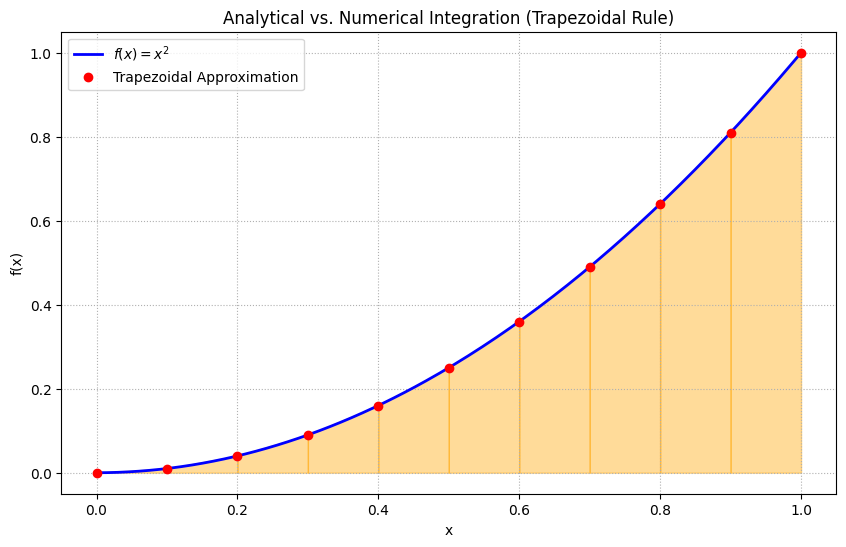

In [4]:
import matplotlib.pyplot as plt

# Generate a smooth curve for the true function
x_smooth = np.linspace(a, b, 200)
y_smooth = f_numeric(x_smooth)

plt.figure(figsize=(10, 6))

# Plot the true function
plt.plot(x_smooth, y_smooth, 'b-', linewidth=2, label='Analytical Function: $f(x) = x^2$')

# Plot the numerical approximation points
plt.plot(x_num, y_num, 'o', color='red')

# Fill the area under the curve with trapezoids
for i in range(n):
    plt.fill_between([x_num[i], x_num[i+1]], [y_num[i], y_num[i+1]], color='orange', alpha=0.4)

# Add labels and title
plt.title('Analytical vs. Numerical Integration (Trapezoidal Rule)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['$f(x) = x^2$', 'Trapezoidal Approximation'])
plt.grid(True, linestyle=':')
plt.show()

##### 2.4 Discussion

- The symbolic (analytical) result gives the exact value ( $I = \frac{1}{3}$ ).
- The numerical result approximates this value using discrete computations, and the precision depends on the number of subintervals ( $n$ ).
- As ( $n$ ) increases, the approximation converges to the analytical result — but at the cost of more computations.

This example illustrates a key motivation in numerical analysis:

- Even when exact solutions exist, numerical methods allow us to approximate them efficiently — and they are essential when symbolic solutions are impossible.